In [1]:
import pandas as pd 
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


In [2]:
summer_path = "datums/summer.csv"
winter_path = 'datums/winter.csv'
dictionary_path = 'datums/dictionary.csv'
baby_names_path = 'datums/NationalNames.csv'



In [3]:
#combine summer and winter into one table. add season column. 
summer_df = pd.read_csv(summer_path)
winter_df = pd.read_csv(winter_path)

summer_df['Season'] = "Summer"
winter_df['Season'] = "Winter"

olympic_df = summer_df.append(winter_df)

#filter by years in the baby names database
olympic_df = olympic_df[olympic_df['Year'] >= 1896]
olympic_df = olympic_df[olympic_df['Year'] <= 2015]

#get first names from the Athelete column
olympic_df['FirstName'] = olympic_df.Athlete.str.split(",",expand = True)[1]

olympic_df['FirstName'] = olympic_df.FirstName.str.split(expand = True)[0]

olympic_df['Initial'] = olympic_df.FirstName.str.find(".")

olympic_df = olympic_df[olympic_df["Initial"] == -1]

olympic_df = olympic_df.drop("Initial", axis=1)

olympic_df

# olympic_df.to_csv("Output/olympics.csv", index = False)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Season,FirstName
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Alfred
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Otto
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Dimitrios
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Ioannis
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Spiridon
...,...,...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter,Jenny
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter,Jamie
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter,Dominique
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter,Eva


In [4]:
#topline olympians with most gold medals

In [5]:
#gold medal winners and baby bump in baby names

In [6]:
#winter or summer olympics more influental? 

In [7]:
# Winningest names

male_names = olympic_df[olympic_df['Gender'] == 'Men'].groupby("FirstName").count()

top_male_names = male_names.sort_values(['Medal'], ascending = False)[0:5]

top_male_names



female_names = olympic_df[olympic_df['Gender'] == 'Women'].groupby("FirstName").count()

top_female_names = female_names.sort_values(['Medal'], ascending = False)[0:5]

top_female_names

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Season
FirstName,,,,,,,,,,
Elena,123,123,123,123,123,123,123,123,123,123
Maria,110,110,110,110,110,110,110,110,110,110
Olga,107,107,107,107,107,107,107,107,107,107
Anna,77,77,77,77,77,77,77,77,77,77
Svetlana,65,65,65,65,65,65,65,65,65,65


<BarContainer object of 5 artists>

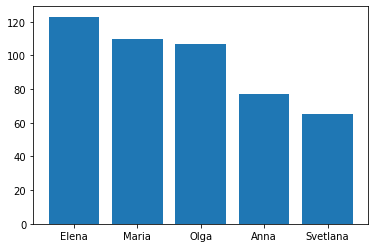

In [14]:
plt.bar(top_female_names.index,top_female_names['Medal'])

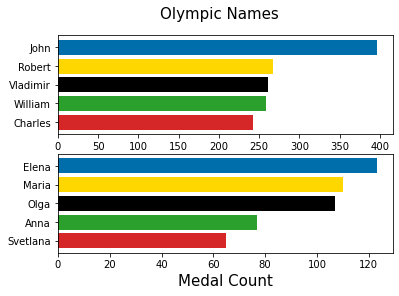

In [72]:
fig, (ax1, ax2) = plt.subplots(2)
# font = {
#     'color' : 'maroon',
#     'size' : '30'
# }

fig.suptitle('Olympic Names', size = 15)



OLYMPIC_COLORS = [(0,.43,.666), 'gold', 'black', 'tab:green', 'tab:red']

ax1.barh(top_male_names.index,top_male_names['Medal'], color = OLYMPIC_COLORS)
ax2.barh(top_female_names.index,top_female_names['Medal'],  color = OLYMPIC_COLORS)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax2.set_xlabel("Medal Count", size = 15)




# fig.xaxis("Male names")

plt.show()